$\Large \text{Testing 1/12 degree simulation}$ 

1/12$^{\circ}$ simulation is continued from 1/4$^{\circ}$ simulation. Forcing and sponge details are the same as in the coarse resolution run.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import xarray as xr
from xgcm import Grid
import dask 
import dask.distributed
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [32]:
from dask.distributed import Client
from dask.distributed import LocalCluster
cluster = LocalCluster()
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:35849 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 16 Memory: 270.45 GB


In [3]:
ppdir = "/work/Hemant.Khatri/MOM6_idealised/PEM_ACC/N_75/Z_star/TS_Wright/Res_025/"
ds_stat_025 = xr.open_mfdataset(ppdir+"ocean.stats*.nc")
ds_n_025 = xr.open_mfdataset(ppdir+"prog_n*.nc",decode_times=False)

ppdir = "/work/Hemant.Khatri/MOM6_idealised/PEM_ACC/N_75/Z_star/TS_Wright/Res_008/"
ds_stat_008 = xr.open_dataset(ppdir+"ocean.stats.nc")
ds_n_008 = xr.open_dataset(ppdir+"prog.nc",decode_times=False)

Text(0, 0.5, 'Domain Mean Salinity (psu)')

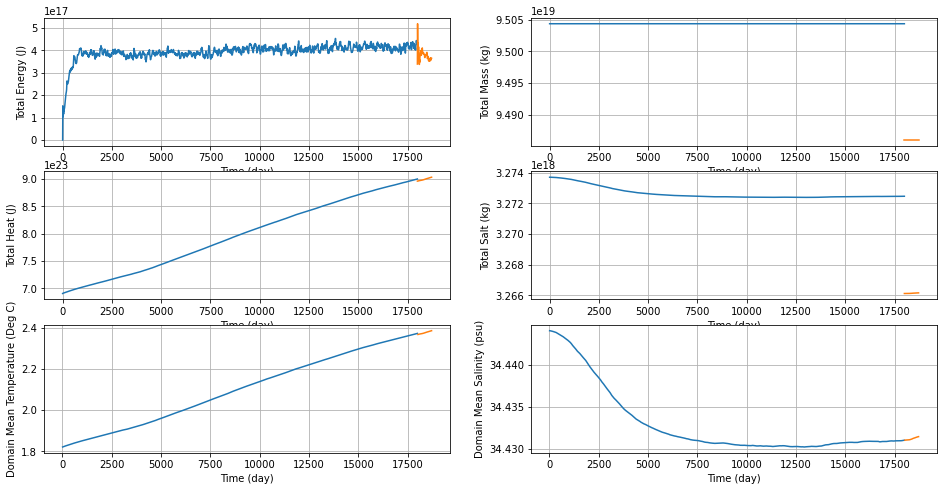

In [7]:
plt.figure(figsize=(16,8))

plt.subplot(3,2,1)
plt.plot(ds_stat_025['Time']/(24*3600*1e9), ds_stat_025['En'])
plt.plot(ds_stat_008['Time']/(24*3600*1e9) + 50*360, ds_stat_008['En'])
plt.grid()
plt.xlabel('Time (day)')
plt.ylabel('Total Energy (J)')

plt.subplot(3,2,2)
plt.plot(ds_stat_025['Time']/(1e9*3600*24), ds_stat_025['Mass'])
plt.plot(ds_stat_008['Time']/(24*3600*1e9) + 50*360, ds_stat_008['Mass'])
plt.grid()
plt.xlabel('Time (day)')
plt.ylabel('Total Mass (kg)')

plt.subplot(3,2,3)
plt.plot(ds_stat_025['Time']/(1e9*3600*24), ds_stat_025['Heat'])
plt.plot(ds_stat_008['Time']/(24*3600*1e9) + 50*360, ds_stat_008['Heat'])
plt.grid()
plt.xlabel('Time (day)')
plt.ylabel('Total Heat (J)')

plt.subplot(3,2,4)
plt.plot(ds_stat_025['Time']/(1e9*3600*24), ds_stat_025['Salt'])
plt.plot(ds_stat_008['Time']/(24*3600*1e9) + 50*360, ds_stat_008['Salt'])
plt.grid()
plt.xlabel('Time (day)')
plt.ylabel('Total Salt (kg)')

plt.subplot(3,2,5)
plt.plot(ds_n_025['Time'], ds_n_025['thetaoga'])
plt.plot(ds_n_008['Time'] + 50*360, ds_n_008['thetaoga'])
plt.grid()
plt.xlabel('Time (day)')
plt.ylabel('Domain Mean Temperature (Deg C)')

plt.subplot(3,2,6)
plt.plot(ds_n_025['Time'], ds_n_025['soga'])
plt.plot(ds_n_008['Time'] + 50*360, ds_n_008['soga'])
plt.grid()
plt.xlabel('Time (day)')
plt.ylabel('Domain Mean Salinity (psu)')

In [33]:
ppdir = "/work/Hemant.Khatri/MOM6_idealised/PEM_ACC/N_75/Z_star/TS_Wright/Res_008/"

ds_z = xr.open_dataset(ppdir+"prog_z.nc",chunks={"Time": 1},decode_times=False)

dsgrid = xr.open_dataset(ppdir+"grid.nc", decode_times=False)
dsgrid = dsgrid.drop('Time')

ds_z = xr.merge([ds_z, dsgrid])

print(ds_z)

<xarray.Dataset>
Dimensions:      (Time: 24, nv: 2, xh: 960, xq: 960, yh: 816, yq: 816, z_i: 36, z_l: 35)
Coordinates:
  * xh           (xh) float64 0.04167 0.125 0.2083 0.2917 ... 79.79 79.88 79.96
  * yh           (yh) float64 -69.99 -69.97 -69.94 ... -30.17 -30.1 -30.02
  * z_l          (z_l) float64 0.5 3.019 9.006 ... 3.366e+03 3.613e+03 3.869e+03
  * z_i          (z_i) float64 0.0 1.0 5.038 12.97 ... 3.487e+03 3.738e+03 4e+03
  * Time         (Time) float64 15.0 45.0 75.0 105.0 ... 615.0 645.0 675.0 705.0
  * nv           (nv) float64 1.0 2.0
  * xq           (xq) float64 0.08333 0.1667 0.25 0.3333 ... 79.83 79.92 80.0
  * yq           (yq) float64 -69.98 -69.95 -69.92 ... -30.13 -30.06 -29.99
Data variables:
    temp         (Time, z_l, yh, xh) float32 dask.array<chunksize=(1, 35, 816, 960), meta=np.ndarray>
    salt         (Time, z_l, yh, xh) float32 dask.array<chunksize=(1, 35, 816, 960), meta=np.ndarray>
    rhopot0      (Time, z_l, yh, xh) float32 dask.array<chunksize=(1, 3

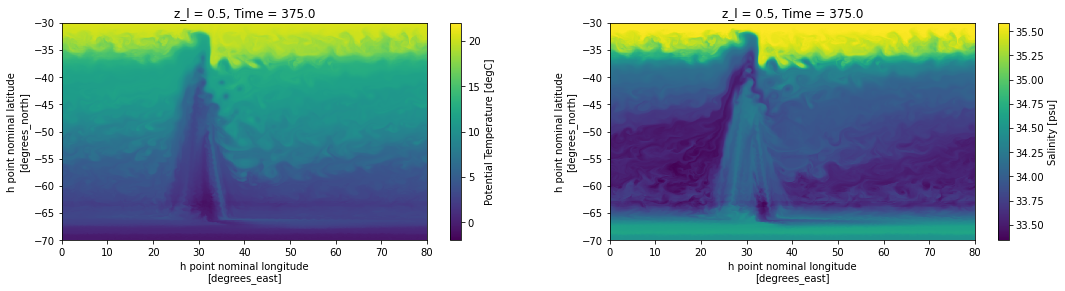

In [12]:
plt.figure(figsize=(18,4))

plt.subplot(1,2,1)
ds_z['temp'].isel(Time=12,z_l=0).plot(vmin=-2., vmax=22., cmap='viridis')

plt.subplot(1,2,2)
ds_z['salt'].isel(Time=12,z_l=0).plot()

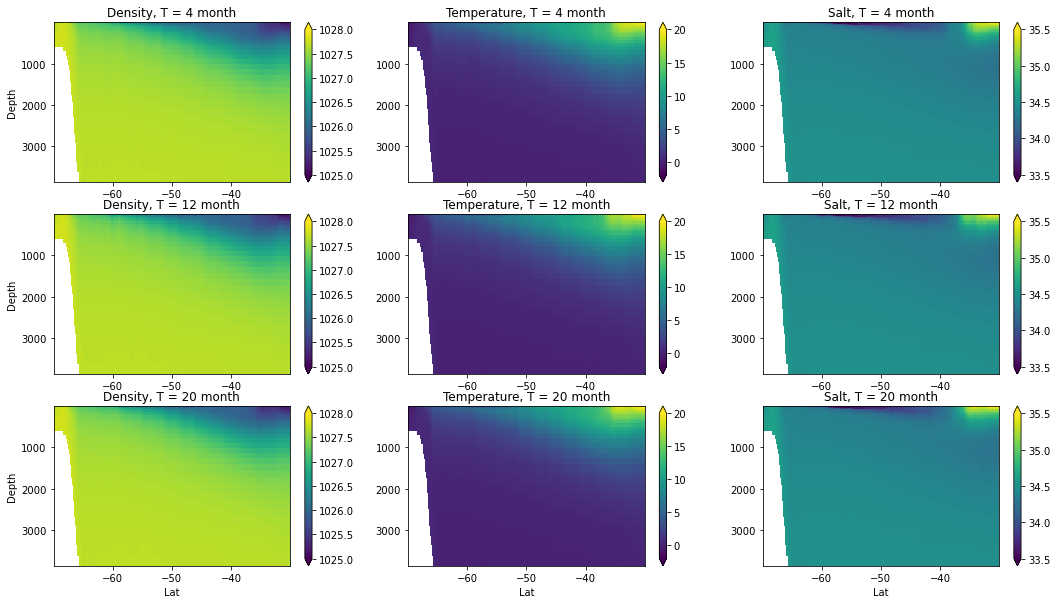

In [15]:
plt.figure(figsize=(18,10))

ct = 0
for i in range(3,24,8):
    plt.subplot(3,3,3*ct + 1)
    tmp = ds_z['rhopot0'].isel(Time = i, xh=840)
    plt.pcolor(ds_z['yh'], ds_z['z_l'], tmp, vmin = 1025.0, vmax = 1028.0)
    plt.colorbar(extend='both')
    plt.ylabel('Depth')
    if(ct>1):
        plt.xlabel('Lat')
    plt.title('Density, T = ' + str(i+1) + ' month')
    plt.gca().invert_yaxis()
    
    plt.subplot(3,3,3*ct + 2)
    tmp = ds_z['temp'].isel(Time = i, xh=840)
    plt.pcolor(ds_z['yh'], ds_z['z_l'], tmp, vmin = -2., vmax = 20.)
    plt.colorbar(extend='both')
    if(ct>1):
        plt.xlabel('Lat')
    plt.title('Temperature, T = ' + str(i+1) + ' month')
    plt.gca().invert_yaxis()
    
    plt.subplot(3,3,3*ct + 3)
    tmp = ds_z['salt'].isel(Time = i, xh=840)
    plt.pcolor(ds_z['yh'], ds_z['z_l'], tmp, vmin = 33.5, vmax = 35.5)
    plt.colorbar(extend='both')
    if(ct>1):
        plt.xlabel('Lat')
    plt.title('Salt, T = ' + str(i+1) + ' month')
    plt.gca().invert_yaxis()
    
    ct = ct + 1

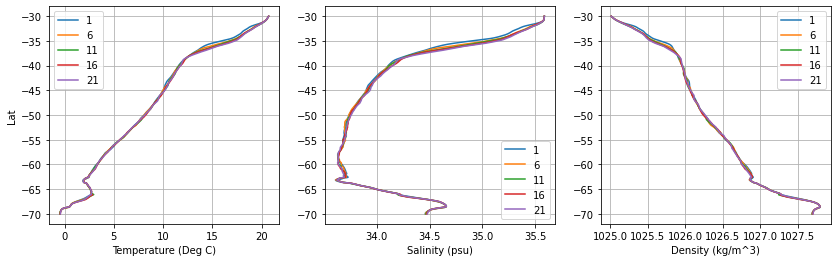

In [16]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
for i in range(0,24,5):
    tmp = ds_z['temp'].isel(Time=i).isel(z_l=0).mean('xh')
    plt.plot(tmp, ds_z['yh'], label = str(i+1))
plt.grid()
plt.xlabel('Temperature (Deg C)')
plt.ylabel('Lat')
plt.legend()

plt.subplot(1,3,2)
for i in range(0,24,5):
    tmp = ds_z['salt'].isel(Time=i).isel(z_l=0).mean('xh')
    plt.plot(tmp, ds_z['yh'], label = str(i+1))
plt.grid()
plt.xlabel('Salinity (psu)')
plt.legend()

plt.subplot(1,3,3)
for i in range(0,24,5):
    tmp = ds_z['rhopot0'].isel(Time=i).isel(z_l=0).mean('xh')
    plt.plot(tmp, ds_z['yh'], label = str(i+1))
plt.grid()
plt.xlabel('Density (kg/m^3)')
plt.legend()

Text(0.5, 1.0, '67 S')

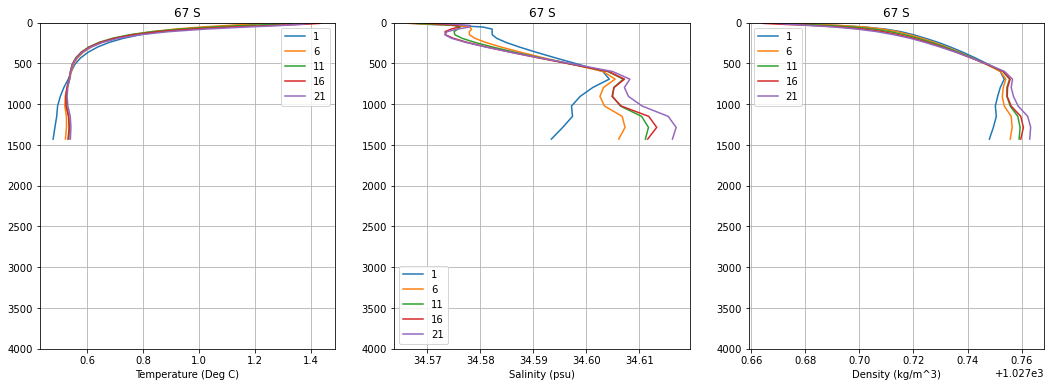

In [17]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
for i in range(0,24,5):
    tmp = ds_z['temp'].isel(Time=i).sel(yh=slice(-68.0, -67.0)).mean(['xh','yh'])
    plt.plot(tmp, ds_z['z_l'], label = str(i+1))
plt.grid()
plt.ylim((0,4000))
plt.gca().invert_yaxis()
plt.xlabel('Temperature (Deg C)')
plt.legend()
plt.title('67 S')

plt.subplot(1,3,2)
for i in range(0,24,5):
    tmp = ds_z['salt'].isel(Time=i).sel(yh=slice(-68.0, -67.0)).mean(['xh','yh'])
    plt.plot(tmp, ds_z['z_l'], label = str(i+1))
plt.grid()
plt.ylim((0,4000))
plt.gca().invert_yaxis()
plt.xlabel('Salinity (psu)')
plt.legend()
plt.title('67 S')

plt.subplot(1,3,3)
for i in range(0,24,5):
    tmp = ds_z['rhopot0'].isel(Time=i).sel(yh=slice(-68.0, -67.0)).mean(['xh','yh'])
    plt.plot(tmp, ds_z['z_l'], label = str(i+1))
plt.grid()
plt.ylim((0,4000))
plt.gca().invert_yaxis()
plt.xlabel('Density (kg/m^3)')
plt.legend()
plt.title('67 S')

In [4]:
grid = Grid(ds_z, coords={'X': {'center': 'xh', 'right': 'xq'},
                        'Y': {'center': 'yh', 'right': 'yq'},
                        'Z': {'center': 'z_l', 'outer': 'z_i'} }, periodic=['X']);

In [7]:
ds1 = ds_z #.mean(['xh', 'xq']) #.sel(xh=slice(50.,80.), xq =slice(50.,80.)).mean(['xh', 'xq'])
dz = grid.diff(ds1['z_i'], axis='Z')

In [8]:
# -ve sign is omitted because cusum performs integration from top to bottom as z_l is positive with depth

psi_m = grid.cumsum(ds1['v'] * dz * ds1['dxCv'], 'Z', boundary='fill')
psi_m = psi_m.sum('xh')

#psi_m =  -tmp #- (ds1['v'] * dz * ds1['dxCv'] + tmp - 0*tmp.isel(z_l=34))

psi = grid.cumsum(ds1['vmo'], 'Z', boundary='fill')
psi = psi.sum('xh')

#psi = - tmp #(ds1['vmo'] + tmp  - tmp.isel(z_l=34))

psi = psi / 1035.

psi_e = psi - psi_m     

print(psi, psi_m)

<xarray.DataArray 'concatenate-d50f7228452caecd44f41ce720ad4959' (Time: 24, z_i: 36, yq: 816)>
dask.array<truediv, shape=(24, 36, 816), dtype=float32, chunksize=(1, 35, 816), chunktype=numpy.ndarray>
Coordinates:
  * Time     (Time) float64 15.0 45.0 75.0 105.0 ... 615.0 645.0 675.0 705.0
  * z_i      (z_i) float64 0.0 1.0 5.038 12.97 ... 3.487e+03 3.738e+03 4e+03
  * yq       (yq) float64 -69.98 -69.95 -69.92 -69.89 ... -30.13 -30.06 -29.99 <xarray.DataArray 'concatenate-a8921e1bc885d7f108934773b9203aed' (Time: 24, z_i: 36, yq: 816)>
dask.array<sum-aggregate, shape=(24, 36, 816), dtype=float64, chunksize=(1, 35, 816), chunktype=numpy.ndarray>
Coordinates:
  * Time     (Time) float64 15.0 45.0 75.0 105.0 ... 615.0 645.0 675.0 705.0
  * z_i      (z_i) float64 0.0 1.0 5.038 12.97 ... 3.487e+03 3.738e+03 4e+03
  * yq       (yq) float64 -69.98 -69.95 -69.92 -69.89 ... -30.13 -30.06 -29.99


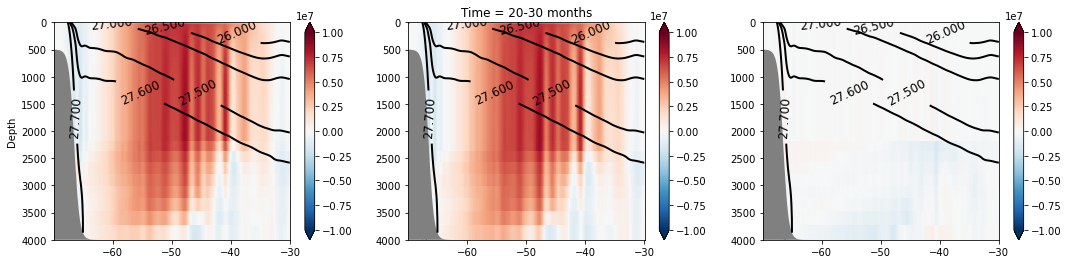

In [10]:
plt.figure(figsize=(18,4))

rho_lev = [26.0, 26.5, 27.0, 27.5, 27.6,27.7]

max_r = 1.e7
for ct in range(0,1):
    
    rho = ds_z['rhopot0'].isel(Time=slice(10*(ct+1), 10*(ct+2))).mean(['Time','xh']).load() - 1000.
    depth = ds1['depth_ocean'].isel(xh=0)
    
    plt.subplot(1,3,3*ct + 1)
    tmp1 = psi.isel(Time=slice(10*(ct+1), 10*(ct+2))).mean('Time').load()
    plt.pcolor(ds1['yq'], ds1['z_i'], tmp1, vmin = -max_r, vmax = max_r, cmap='RdBu_r')
    plt.colorbar(extend='both')
    CS = plt.contour(ds1['yh'], ds1['z_l'], rho, rho_lev, colors='black', linewidths=2)
    plt.clabel(CS, inline=True, fontsize=12)
    plt.fill_between(ds1['yh'], depth, 4000., fc='grey')
    plt.ylabel('Depth')
    if(ct == 2):
        plt.xlabel('Lat')
    plt.gca().invert_yaxis()

    plt.subplot(1,3,3*ct + 2)
    tmp2 = psi_m.isel(Time=slice(10*(ct+1), 10*(ct+2))).mean('Time').load()
    plt.pcolor(ds1['yq'], ds1['z_i'], tmp2, vmin = -max_r, vmax = max_r, cmap='RdBu_r')
    plt.colorbar(extend='both')
    CS = plt.contour(ds1['yh'], ds1['z_l'], rho, rho_lev, colors='black', linewidths=2)
    plt.clabel(CS, inline=True, fontsize=12)
    plt.fill_between(ds1['yh'], depth, 4000., fc='grey')
    strin = 'Time = '+ str((ct+2)*10)+'-'+str((ct+3)*10)+ ' months'
    plt.title(strin)
    if(ct == 2):
        plt.xlabel('Lat')
    plt.gca().invert_yaxis()

    plt.subplot(1,3,3*ct + 3)
    tmp = tmp1 - tmp2 #psi_e.isel(Time=slice(10*(ct+2), 10*(ct+3))).mean('Time')
    plt.pcolor(ds1['yq'], ds1['z_i'], tmp, vmin = -max_r, vmax = max_r, cmap='RdBu_r')
    plt.colorbar(extend='both')
    CS = plt.contour(ds1['yh'], ds1['z_l'], rho, rho_lev, colors='black', linewidths=2)
    plt.fill_between(ds1['yh'], depth, 4000., fc='grey')
    plt.clabel(CS, inline=True, fontsize=12)
    if(ct == 2):
        plt.xlabel('Lat')
    plt.gca().invert_yaxis()
    

## Overturning in rho

In [3]:
ppdir = "/work/Hemant.Khatri/MOM6_idealised/PEM_ACC/N_75/Z_star/TS_Wright/Res_008/"

ds_rho = xr.open_dataset(ppdir+"prog_rho2.nc",decode_times=False)

dsgrid = xr.open_dataset(ppdir+"grid.nc", decode_times=False)
dsgrid = dsgrid.drop('Time')

ds_rho = xr.merge([ds_rho, dsgrid])

print(ds_rho)

<xarray.Dataset>
Dimensions:      (Time: 12, nv: 2, rho2_i: 36, rho2_l: 35, xh: 960, xq: 960, yh: 816, yq: 816)
Coordinates:
  * xh           (xh) float64 0.04167 0.125 0.2083 0.2917 ... 79.79 79.88 79.96
  * yh           (yh) float64 -69.99 -69.97 -69.94 ... -30.17 -30.1 -30.02
  * rho2_l       (rho2_l) float64 1.032e+03 1.033e+03 ... 1.037e+03 1.037e+03
  * rho2_i       (rho2_i) float64 1.032e+03 1.032e+03 ... 1.037e+03 1.038e+03
  * Time         (Time) float64 735.0 765.0 795.0 ... 1.035e+03 1.065e+03
  * nv           (nv) float64 1.0 2.0
  * xq           (xq) float64 0.08333 0.1667 0.25 0.3333 ... 79.83 79.92 80.0
  * yq           (yq) float64 -69.98 -69.95 -69.92 ... -30.13 -30.06 -29.99
Data variables:
    temp         (Time, rho2_l, yh, xh) float32 ...
    salt         (Time, rho2_l, yh, xh) float32 ...
    u            (Time, rho2_l, yh, xq) float32 ...
    v            (Time, rho2_l, yq, xh) float32 ...
    umo          (Time, rho2_l, yh, xq) float32 ...
    vmo          (Time

In [4]:
grid_r = Grid(ds_rho, coords={'X': {'center': 'xh', 'right': 'xq'},
                        'Y': {'center': 'yh', 'right': 'yq'},
                        'Rho': {'center': 'rho2_l', 'outer': 'rho2_i'} }, periodic=['X']);

psi_r = grid_r.cumsum(ds_rho['vmo'].mean('Time'), 'Rho', boundary='fill')
psi_r = psi_r.sum('xh')

psi_r = psi_r / 1035.

In [6]:
z = grid_r.cumsum(ds_rho['h'].mean('Time'), 'Rho', boundary='fill')
z = grid_r.interp(z, 'Y', boundary='fill').isel(xh=0)

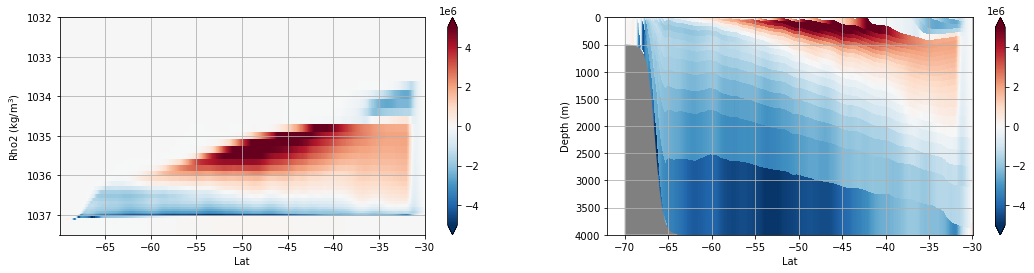

In [7]:
plt.figure(figsize=(18,4))

max_r = 0.5e7

plt.subplot(1,2,1)
plt.pcolor(ds_rho['yq'], ds_rho['rho2_i'], psi_r, vmin = -max_r, vmax = max_r, cmap='RdBu_r')
plt.colorbar(extend='both')
#CS = plt.contour(ds1['yh'], ds1['z_l'], rho, rho_lev, colors='black', linewidths=2)
#plt.clabel(CS, inline=True, fontsize=12)
#plt.fill_between(ds1['yh'], depth, 4000., fc='grey')
plt.ylabel('Rho2 (kg/m$^3$)')
#if(ct == 2):
plt.xlabel('Lat')
plt.grid()
plt.gca().invert_yaxis()

plt.subplot(1,2,2)
depth = ds_rho['depth_ocean'].isel(xh=0)
plt.pcolor(ds_rho['yq'], z, psi_r, vmin = -max_r, vmax = max_r, cmap='RdBu_r')
plt.fill_between(ds_rho['yh'], depth, 4000., fc='grey')
plt.colorbar(extend='both')
plt.ylabel('Depth (m)')
plt.xlabel('Lat')
plt.grid()
plt.gca().invert_yaxis()

## Mid-depth max and min in Theta and S

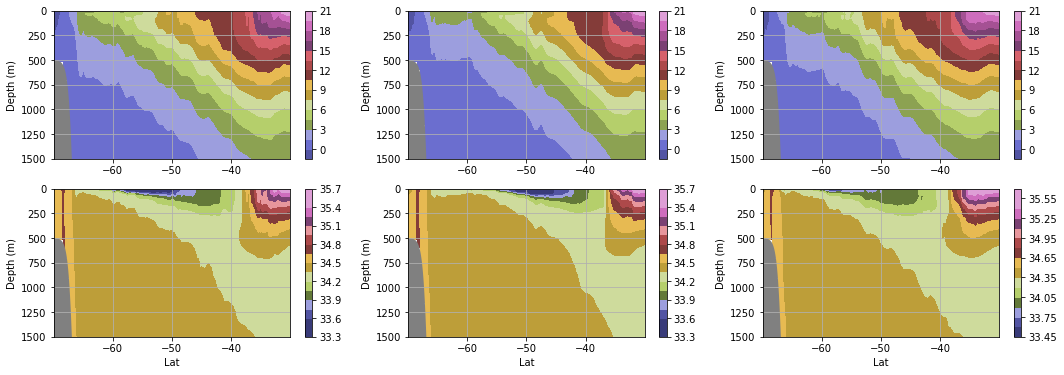

In [6]:

plt.figure(figsize=(18,6))

depth = ds_z['depth_ocean'].isel(xh=0)

for i in range(0,3):
    ds1 = ds_z.isel(Time=23, xh=i*300)
    plt.subplot(2,3,i+1)
    plt.contourf(ds1['yh'], ds1['z_l'], ds1['temp'], 20, vmin = -2, vmax = 20, cmap='tab20b')
    plt.colorbar(extend='both')
    plt.fill_between(ds1['yh'], depth, 4000., fc='grey')
    plt.ylim((0.,1500))
    plt.ylabel('Depth (m)')
    #if(ct == 2):
    #plt.xlabel('Lat')
    #plt.title('Lat = ', str(ds1.xh.values[i*100]))
    plt.grid()
    plt.gca().invert_yaxis()

for i in range(0,3):
    ds1 = ds_z.isel(Time=23, xh=i*300)
    plt.subplot(2,3,i+4)
    plt.contourf(ds1['yh'], ds1['z_l'], ds1['salt'], 20, vmin = 33.5, vmax = 35.5, cmap='tab20b')
    plt.colorbar(extend='both')
    plt.fill_between(ds1['yh'], depth, 4000., fc='grey')
    plt.ylim((0.,1500))
    plt.ylabel('Depth (m)')
    plt.xlabel('Lat')
    plt.grid()
    plt.gca().invert_yaxis()

Text(0.5, 1.0, 'Salinity, Downstream of Ridge')

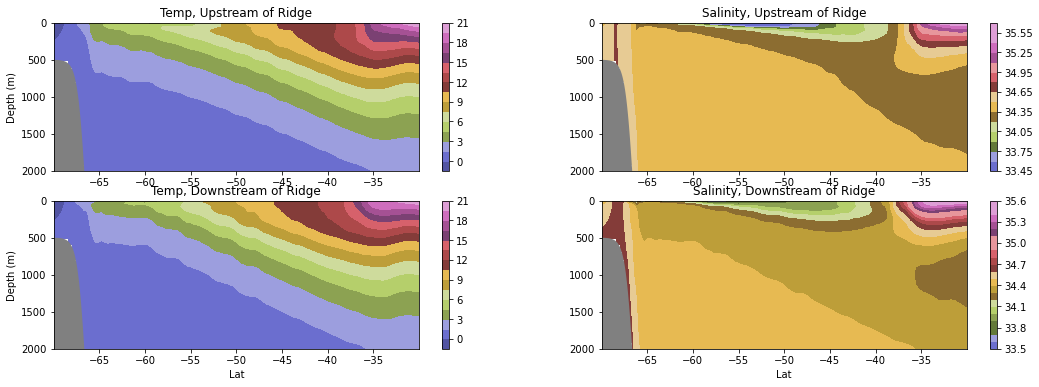

In [34]:
plt.figure(figsize=(18,6))

ds2 = ds_z.isel(Time=20).sel(xh=slice(0,20)).mean('xh')

plt.subplot(2,2,1)
plt.contourf(ds2['yh'], ds2['z_l'], ds2['temp'], 20, vmin = -2, vmax = 20, cmap='tab20b')
plt.colorbar()
plt.fill_between(ds2['yh'], depth, 4000., fc='grey')
plt.ylim((0.,2000))
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.title('Temp, Upstream of Ridge')

plt.subplot(2,2,2)
plt.contourf(ds2['yh'], ds2['z_l'], ds2['salt'], 20, vmin = 33.3, vmax = 35.5, cmap='tab20b')
plt.colorbar()
plt.fill_between(ds2['yh'], depth, 4000., fc='grey')
plt.ylim((0.,2000))
plt.gca().invert_yaxis()
plt.title('Salinity, Upstream of Ridge')

ds2 = ds_z.isel(Time=20).sel(xh=slice(40,60)).mean('xh')

plt.subplot(2,2,3)
plt.contourf(ds2['yh'], ds2['z_l'], ds2['temp'], 20, vmin = -2, vmax = 20, cmap='tab20b')
plt.colorbar()
plt.fill_between(ds1['yh'], depth, 4000., fc='grey')
plt.ylim((0.,2000))
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.xlabel('Lat')
plt.title('Temp, Downstream of Ridge')

plt.subplot(2,2,4)
plt.contourf(ds2['yh'], ds2['z_l'], ds2['salt'], 20, vmin = 33.3, vmax = 35.5, cmap='tab20b')
plt.colorbar()
plt.fill_between(ds1['yh'], depth, 4000., fc='grey')
plt.ylim((0.,2000))
plt.gca().invert_yaxis()
plt.xlabel('Lat')
plt.title('Salinity, Downstream of Ridge')

Text(0.5, 1.0, '34-36 S')

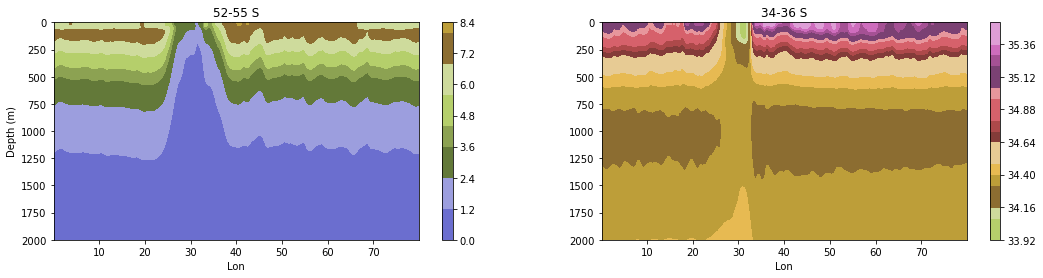

In [37]:
plt.figure(figsize=(18,4))

ds2 = ds_z.isel(Time=20).sel(yh=slice(-55,-52)).mean('yh')

plt.subplot(1,2,1)
plt.contourf(ds2['xh'], ds2['z_l'], ds2['temp'], 20, vmin = -2, vmax = 20, cmap='tab20b')
plt.colorbar()
#plt.fill_between(ds1['yh'], depth, 4000., fc='grey')
plt.ylim((0.,2000))
plt.gca().invert_yaxis()
plt.xlabel('Lon')
plt.ylabel('Depth (m)')
plt.title('52-55 S')

ds2 = ds_z.isel(Time=20).sel(yh=slice(-36,-34)).mean('yh')
plt.subplot(1,2,2)
plt.contourf(ds2['xh'], ds2['z_l'], ds2['salt'], 20, vmin = 33.3, vmax = 35.5, cmap='tab20b')
plt.colorbar()
#plt.fill_between(ds1['yh'], depth, 4000., fc='grey')
plt.ylim((0.,2000))
plt.gca().invert_yaxis()
plt.xlabel('Lon')
plt.title('34-36 S')

In [38]:
ds_z.close()
client.close()
cluster.close()